# Load Data from Kaggle

In [1]:
!pip install -q kaggle
!pip install -q kaggle-cli

In [2]:
# Upload the kaggle.json from Kaggle -> My Account -> Create New API Token
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [3]:
for file_name in uploaded.keys():
  print(file_name)

kaggle.json


In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!ls ~/.kaggle

kaggle.json


In [8]:
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 67 Sep  2 13:25 kaggle.json


In [9]:
!cat ~/.kaggle/kaggle.json

{"username":"nabanitaroy","key":"007deb4cc3da33cee6de21461074ace2"}

In [10]:
!kaggle datasets list -h

usage: kaggle datasets list [-h] [--sort-by SORT_BY] [--size SIZE]
                            [--file-type FILE_TYPE] [--license LICENSE_NAME]
                            [--tags TAG_IDS] [-s SEARCH] [-m] [--user USER]
                            [-p PAGE] [-v]

optional arguments:
  -h, --help            show this help message and exit
  --sort-by SORT_BY     Sort list results. Default is 'hottest'. Valid options are 'hottest', 'votes', 'updated', and 'active'
  --size SIZE           Search for datasets of a specific size. Default is 'all'. Valid options are 'all', 'small', 'medium', and 'large'
  --file-type FILE_TYPE
                        Search for datasets with a specific file type. Default is 'all'. Valid options are 'all', 'csv', 'sqlite', 'json', and 'bigQuery'. Please note that bigQuery datasets cannot be downloaded
  --license LICENSE_NAME
                        Search for datasets with a specific license. Default is 'all'. Valid options are 'all', 'cc', 'gpl', 'odb', and

In [11]:
!kaggle datasets list -s hsankesara/flickr-image-dataset

ref                              title                 size  lastUpdated          downloadCount  
-------------------------------  --------------------  ----  -------------------  -------------  
hsankesara/flickr-image-dataset  Flickr Image dataset   8GB  2018-06-12 20:34:20           8567  
greenahn/flickrproc              flickr-proc            2GB  2019-06-21 09:07:30             16  


In [12]:
!kaggle datasets download hsankesara/flickr-image-dataset -p /dataset

flickr-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!ls -a

 .    .config			      flickr30k_images	 kaggle.json
 ..   df_captions_preprocessed1.pkl  'kaggle (1).json'	 sample_data


In [14]:
!ls /dataset

flickr-image-dataset.zip


In [15]:
!unzip /dataset/*.zip

Archive:  /dataset/flickr-image-dataset.zip
replace flickr30k_images/flickr30k_images/1000092795.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
!ls

 df_captions_preprocessed1.pkl	'kaggle (1).json'   sample_data
 flickr30k_images		 kaggle.json


In [17]:
!ls flickr30k_images

flickr30k_images  results.csv


In [31]:
!ls flickr30k_images/flickr30k_images

Streaming output truncated to the last 5000 lines.
200553102.jpg	3068945309.jpg	4222067827.jpg	535830521.jpg
200763637.jpg	3068966816.jpg	4222240844.jpg	5359437945.jpg
200764606.jpg	3068994801.jpg	4222323987.jpg	5361355399.jpg
200764658.jpg	3069037969.jpg	4222836730.jpg	53614287.jpg
200767661.jpg	3069216757.jpg	4223855717.jpg	536147209.jpg
200771289.jpg	3069217945.jpg	4224501932.jpg	5361551308.jpg
200778628.jpg	3069282021.jpg	4224555124.jpg	536156200.jpg
200778857.jpg	3069514336.jpg	4224693415.jpg	5362687336.jpg
2007844443.jpg	3069701112.jpg	4225248313.jpg	5363528971.jpg
200797624.jpg	3069786374.jpg	42256309.jpg	5363903246.jpg
200875615.jpg	3069837790.jpg	4225726986.jpg	5364849864.jpg
2009636597.jpg	3069937639.jpg	422577096.jpg	536495604.jpg
2010898020.jpg	307000532.jpg	4226136348.jpg	5365075444.jpg
201108031.jpg	3070011270.jpg	4226270513.jpg	536533294.jpg
2011797111.jpg	3070031806.jpg	422736619.jpg	536537638.jpg
201214645.jpg	3070036584.jpg	422737954.jpg	5366770416.jpg
201314419.jpg	3

The flickr30k_images folder contains the images. The results.csv are the list of captions per image file name.

# Load the Captions Data

In [32]:
import pandas as pd
df = pd.read_csv('flickr30k_images/results.csv', sep='|')
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [33]:
df.shape

(158915, 3)

In [34]:
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [35]:
df.columns

Index(['image_name', ' comment_number', ' comment'], dtype='object')

In [36]:
clean_cols = []
for col in df.columns:
    if ' ' in col:
        col = col.strip()
    clean_cols.append(col)
df.columns = clean_cols
df.columns

Index(['image_name', 'comment_number', 'comment'], dtype='object')

In [37]:
df.comment_number.value_counts()

 3                                    31783
 0                                    31783
 2                                    31783
 1                                    31783
 4                                    31782
 4   A dog runs across the grass .        1
Name: comment_number, dtype: int64

In [38]:
df[df.comment_number.str.contains('4   A dog runs across the grass .')]

,image_name,comment_number,comment
19999,2199200615.jpg,4 A dog runs across the grass .,NaN


In [39]:
df.iloc[19999,2] = 'A dog runs across the grass .'
df.iloc[19999,1] = 4

In [40]:
df[df.image_name == '2199200615.jpg']

,image_name,comment_number,comment
19995,2199200615.jpg,0,A dog running on green grass with its mouth o...
19996,2199200615.jpg,1,a white dog is running with its mouth open ac...
19997,2199200615.jpg,2,"A white , black , and brown dog runs in a fie..."
19998,2199200615.jpg,3,A dog runs across the grassy field .
19999,2199200615.jpg,4,A dog runs across the grass .


In [41]:
df.comment_number.value_counts()

 3    31783
 0    31783
 2    31783
 1    31783
 4    31782
4         1
Name: comment_number, dtype: int64

In [42]:
df['comment_number'] = df.comment_number.astype(int)


In [43]:
df.comment_number.value_counts()

4    31783
3    31783
2    31783
1    31783
0    31783
Name: comment_number, dtype: int64

# Image EDA

In [44]:
image_data_path = 'flickr30k_images/flickr30k_images/'

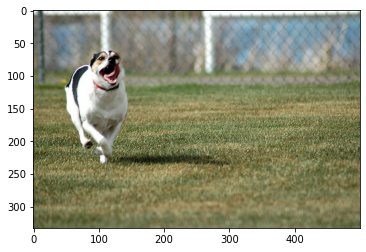

In [45]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
image_load = load_img(image_data_path + "2199200615.jpg")
plt.imshow(image_load)

# Texts Cleaning

In [46]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [47]:
import string

def clean_captions(x):
  clean_caption_text = []
  for token in nlp(x.strip().lower()):
    if token.text in string.punctuation or len(token.text) <= 1 or not token.text.isalpha():
      continue
    # print(token)
    clean_caption_text.append(token.text)
  return clean_caption_text


In [48]:
df['tokenized_captions'] = df['comment'].apply(lambda x: clean_captions(x))

In [107]:
df.head()

,image_name,comment_number,comment,tokenized_captions,cleaned_image_name,lstm_input
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,"[two, young, guys, with, shaggy, hair, look, a...",1000092795,"[startseq, two, young, guys, with, shaggy, hai..."
1,1000092795.jpg,1,"Two young , White males are outside near many...","[two, young, white, males, are, outside, near,...",1000092795,"[startseq, two, young, white, males, are, outs..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,"[two, men, in, green, shirts, are, standing, i...",1000092795,"[startseq, two, men, in, green, shirts, are, s..."
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,"[man, in, blue, shirt, standing, in, garden]",1000092795,"[startseq, man, in, blue, shirt, standing, in,..."
4,1000092795.jpg,4,Two friends enjoy time spent together .,"[two, friends, enjoy, time, spent, together]",1000092795,"[startseq, two, friends, enjoy, time, spent, t..."


In [50]:
df['cleaned_image_name'] = df.image_name.str.split('.',  expand=True)[0]

In [51]:
df.head()

,image_name,comment_number,comment,tokenized_captions,cleaned_image_name
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,"[two, young, guys, with, shaggy, hair, look, a...",1000092795
1,1000092795.jpg,1,"Two young , White males are outside near many...","[two, young, white, males, are, outside, near,...",1000092795
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,"[two, men, in, green, shirts, are, standing, i...",1000092795
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,"[man, in, blue, shirt, standing, in, garden]",1000092795
4,1000092795.jpg,4,Two friends enjoy time spent together .,"[two, friends, enjoy, time, spent, together]",1000092795


# Build LSTM

In [52]:
df['lstm_input'] = df['tokenized_captions'].apply(lambda x: ['startseq'] + x +['endseq'])

In [53]:
df.head()

,image_name,comment_number,comment,tokenized_captions,cleaned_image_name,lstm_input
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,"[two, young, guys, with, shaggy, hair, look, a...",1000092795,"[startseq, two, young, guys, with, shaggy, hai..."
1,1000092795.jpg,1,"Two young , White males are outside near many...","[two, young, white, males, are, outside, near,...",1000092795,"[startseq, two, young, white, males, are, outs..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,"[two, men, in, green, shirts, are, standing, i...",1000092795,"[startseq, two, men, in, green, shirts, are, s..."
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,"[man, in, blue, shirt, standing, in, garden]",1000092795,"[startseq, man, in, blue, shirt, standing, in,..."
4,1000092795.jpg,4,Two friends enjoy time spent together .,"[two, friends, enjoy, time, spent, together]",1000092795,"[startseq, two, friends, enjoy, time, spent, t..."


In [54]:
df.to_pickle('df_captions_preprocessed1.pkl')

In [55]:
!ls

 df_captions_preprocessed1.pkl	'kaggle (1).json'   sample_data
 flickr30k_images		 kaggle.json


In [56]:
files.download('df_captions_preprocessed1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [65]:
# load the model
model = VGG16()

In [70]:
# summarize
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [72]:
model.layers[1].input

<tf.Tensor 'input_4:0' shape=(None, 224, 224, 3) dtype=float32>

In [74]:
model.layers[1].output

<tf.Tensor 'block1_conv1/Relu_3:0' shape=(None, 224, 224, 64) dtype=float32>

In [73]:
model.layers[1].activation

<function tensorflow.python.keras.activations.relu>

In [75]:
model.layers[0]

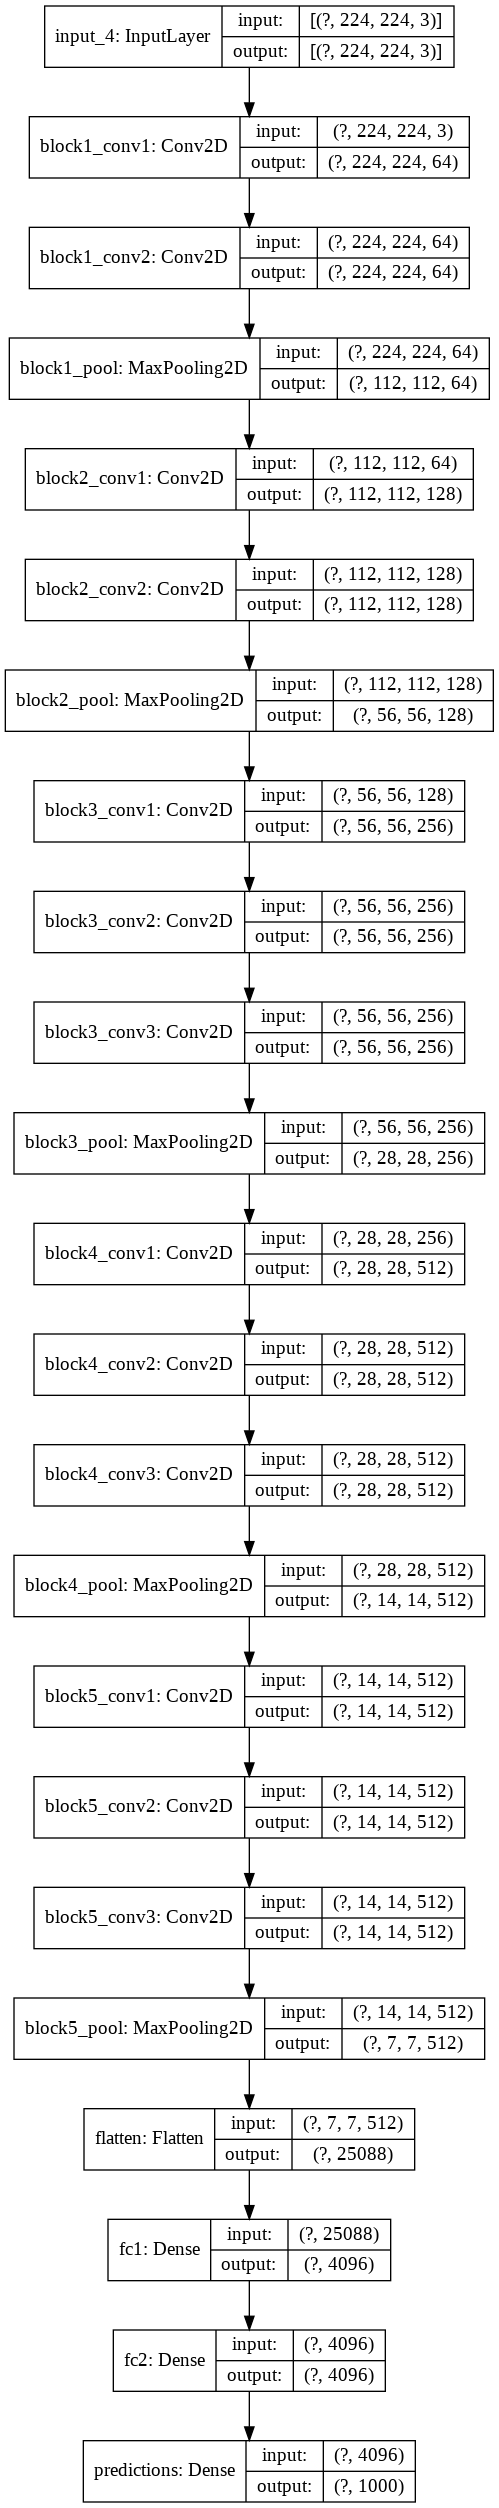

In [82]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB')

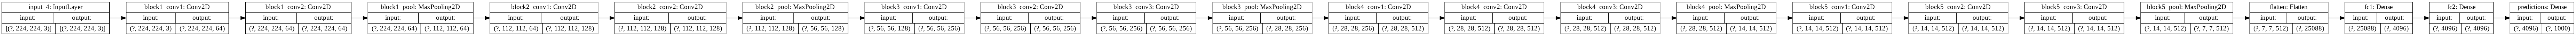

In [80]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='LR')

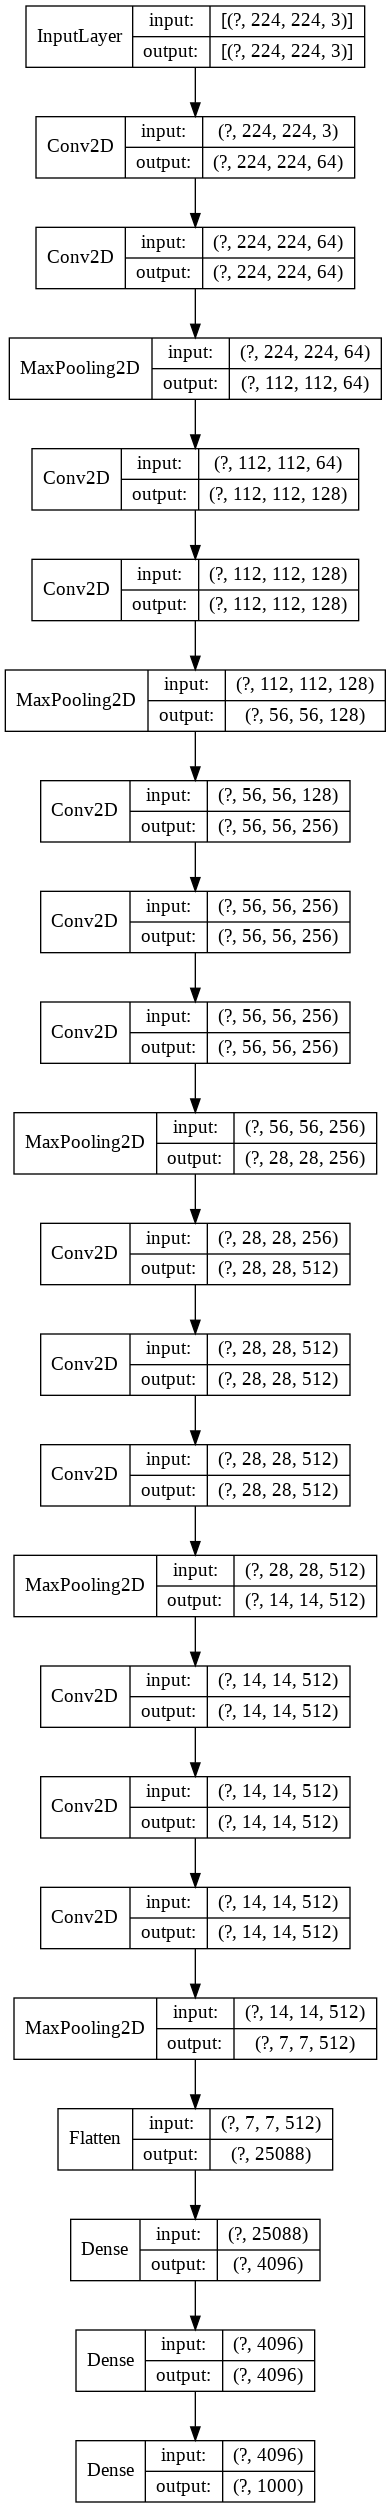

In [83]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=False, rankdir='TB')

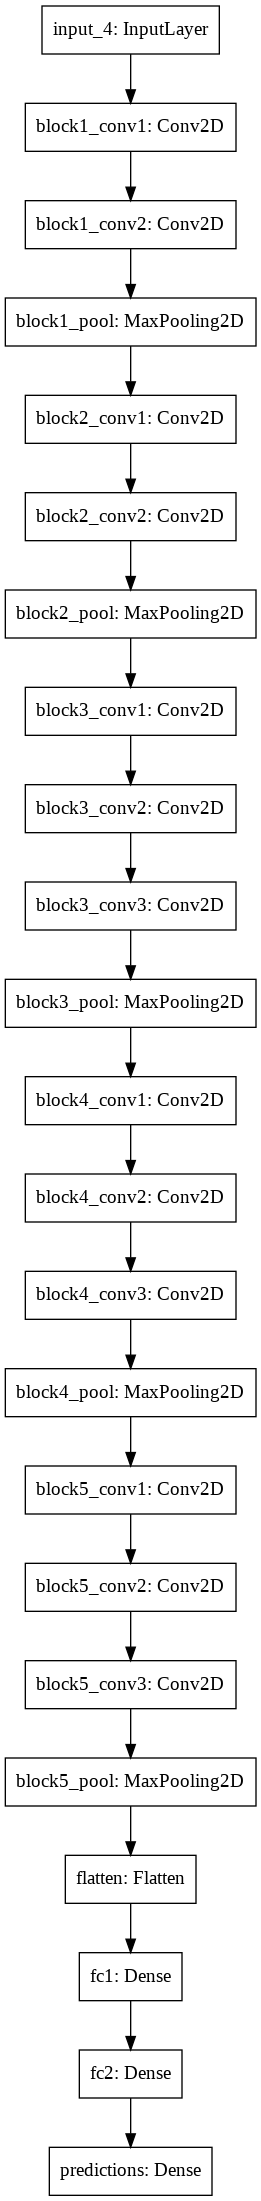

In [84]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=False, show_layer_names=True, rankdir='TB')

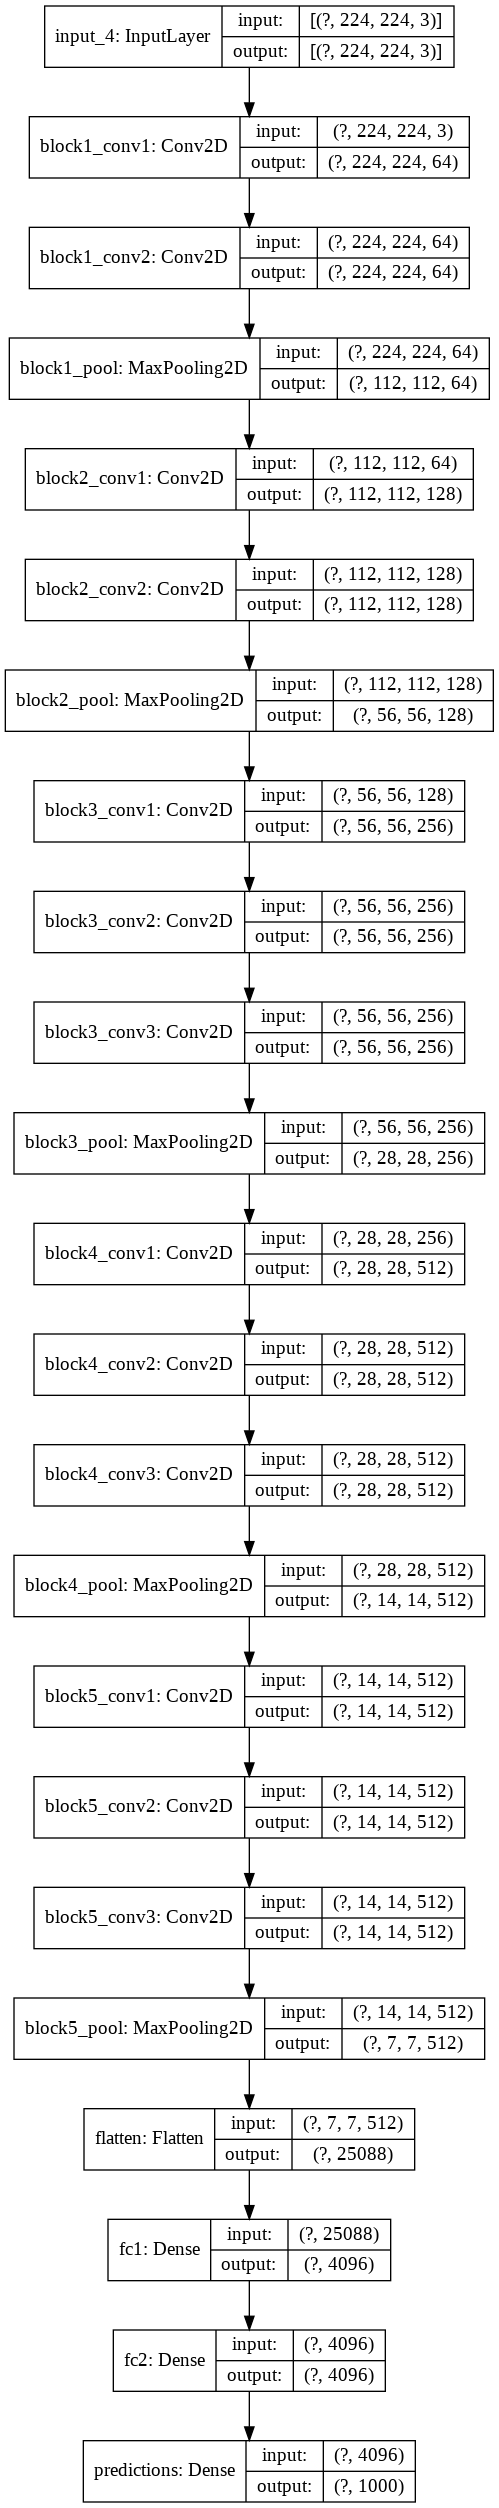

In [86]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [63]:
# re-structure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [64]:
# summarize
print(model.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [87]:
# extract features from each photo
features = dict()

In [88]:
listdir('flickr30k_images/flickr30k_images')

['3030954073.jpg',
 '7052724381.jpg',
 '240696675.jpg',
 '2674742398.jpg',
 '5692076205.jpg',
 '4450338499.jpg',
 '3787061402.jpg',
 '2332806484.jpg',
 '977898311.jpg',
 '925491651.jpg',
 '4460943467.jpg',
 '4054618575.jpg',
 '4893324386.jpg',
 '6502487823.jpg',
 '4862788297.jpg',
 '10101477.jpg',
 '3545976616.jpg',
 '4617937991.jpg',
 '4704577040.jpg',
 '442322125.jpg',
 '4542565918.jpg',
 '2802477687.jpg',
 '2975118353.jpg',
 '3549208986.jpg',
 '7105973793.jpg',
 '4962418713.jpg',
 '4913689385.jpg',
 '3361279771.jpg',
 '4482773167.jpg',
 '525968880.jpg',
 '4806158094.jpg',
 '4768505553.jpg',
 '2572712647.jpg',
 '6269296633.jpg',
 '446138054.jpg',
 '3211199368.jpg',
 '6556864817.jpg',
 '190878894.jpg',
 '981727078.jpg',
 '164622257.jpg',
 '7179751201.jpg',
 '3520048776.jpg',
 '200275830.jpg',
 '137231942.jpg',
 '1414454789.jpg',
 '3157220149.jpg',
 '2890113532.jpg',
 '49533973.jpg',
 '3293642024.jpg',
 '3446299757.jpg',
 '2443241477.jpg',
 '1298866571.jpg',
 '300777683.jpg',
 '3007655

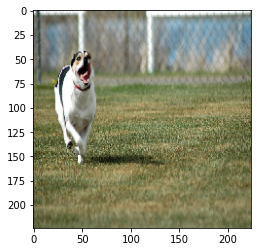

In [109]:
image_load = load_img(image_data_path + "2199200615.jpg", target_size=(224,224,3))
plt.imshow(image_load)

In [110]:
image = img_to_array(image_load)

In [111]:
image.shape

(224, 224, 3)

In [112]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [113]:
image

array([[[[219., 227., 229.],
         [219., 221., 233.],
         [202., 202., 210.],
         ...,
         [252., 254., 253.],
         [230., 235., 231.],
         [246., 245., 250.]],

        [[226., 229., 236.],
         [235., 233., 246.],
         [212., 209., 220.],
         ...,
         [237., 241., 242.],
         [229., 226., 233.],
         [179., 189., 178.]],

        [[223., 227., 230.],
         [232., 231., 237.],
         [201., 200., 205.],
         ...,
         [216., 220., 219.],
         [215., 216., 221.],
         [151., 173., 152.]],

        ...,

        [[ 86.,  94.,  53.],
         [ 95., 102.,  60.],
         [ 94., 101.,  59.],
         ...,
         [107., 107.,  69.],
         [104., 113.,  70.],
         [ 93.,  99.,  63.]],

        [[ 85.,  93.,  52.],
         [ 91.,  98.,  56.],
         [ 92.,  99.,  57.],
         ...,
         [114., 112.,  74.],
         [108., 115.,  73.],
         [100., 104.,  69.]],

        [[ 78.,  86.,  45.],
       

In [114]:
image.shape

(1, 224, 224, 3)

In [115]:
# prepare the image for the VGG model
image = preprocess_input(image)
image.shape

(1, 224, 224, 3)

In [116]:
image

array([[[[125.061    , 110.221    ,  95.32     ],
         [129.061    , 104.221    ,  95.32     ],
         [106.061    ,  85.221    ,  78.32     ],
         ...,
         [149.061    , 137.22101  , 128.32     ],
         [127.061    , 118.221    , 106.32     ],
         [146.061    , 128.22101  , 122.32     ]],

        [[132.061    , 112.221    , 102.32     ],
         [142.061    , 116.221    , 111.32     ],
         [116.061    ,  92.221    ,  88.32     ],
         ...,
         [138.061    , 124.221    , 113.32     ],
         [129.061    , 109.221    , 105.32     ],
         [ 74.061    ,  72.221    ,  55.32     ]],

        [[126.061    , 110.221    ,  99.32     ],
         [133.061    , 114.221    , 108.32     ],
         [101.061    ,  83.221    ,  77.32     ],
         ...,
         [115.061    , 103.221    ,  92.32     ],
         [117.061    ,  99.221    ,  91.32     ],
         [ 48.060997 ,  56.221    ,  27.32     ]],

        ...,

        [[-50.939003 , -22.779    , -3

In [117]:
# get features
feature = model.predict(image, verbose=0)

In [119]:
# get image id
image_id = "2199200615.jpg".split('.')[0]
image_id

'2199200615'

In [120]:
feature

array([[2.01779827e-07, 8.19227353e-08, 6.33023603e-07, 2.60118128e-07,
        5.77254423e-06, 8.99664556e-08, 1.27123755e-07, 2.51194997e-05,
        2.30275491e-05, 1.19067481e-05, 3.60316733e-07, 8.91611853e-06,
        4.03444005e-07, 2.56959333e-06, 1.87148729e-07, 5.32494312e-07,
        1.11112931e-05, 2.14237480e-05, 4.30529326e-05, 2.44474109e-06,
        1.10724875e-06, 8.14625746e-05, 1.33552555e-06, 3.83247680e-05,
        4.31728449e-06, 2.32077795e-07, 1.34659274e-07, 7.63497567e-08,
        6.21017250e-07, 1.53324515e-06, 4.36873137e-07, 1.87537785e-06,
        2.34063123e-07, 2.57453962e-07, 1.25644101e-06, 5.89423109e-07,
        1.08780296e-06, 6.71042528e-07, 3.57187105e-06, 9.21770607e-07,
        5.12871657e-06, 3.13343406e-07, 2.70325842e-07, 1.30963613e-07,
        1.60667526e-06, 5.92552226e-07, 2.02552883e-06, 1.34230584e-06,
        3.73447619e-07, 5.03382921e-07, 2.96453180e-07, 2.53028503e-07,
        1.18469825e-06, 1.21324945e-06, 2.77482604e-06, 2.881297

In [ ]:
for name in listdir('flickr30k_images/flickr30k_images'):
  try:
    # load an image from file
    filename = directory + '/' + name
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    # get image id
    image_id = name.split('.')[0]
    # store feature
    features[image_id] = feature
    # print('>%s' % name)
  except Exception as e:
    print("Error: ", name)
    print(e)
    continue

In [ ]:
new_df = pd.read_pickle()